# Goals of the Case Study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Step 1: Importing Libraries

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [5]:
lead_data.shape

(9240, 37)

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can observe that there are select values for many column. This is because customer did not select any option from the list, hence it shows select. We can take Select values as NULL.

In [8]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [9]:
## check the percentage of null values in each colomns

(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False).describe()

count    37.000000
mean     15.917573
std      23.532888
min       0.000000
25%       0.000000
50%       0.000000
75%      36.287879
max      78.463203
dtype: float64

- How did you hear about X Education : Though it may be Important to know the source of the Lead but with 75% null value it will not help achiving us anything.
- Lead Quality & Lead Profile : As we have to build a model about the richness of a lead we do not require colomns that Indicates the quality of lead based on the intuition of the employee who has been assigned to the lead.

In [11]:
## there are colomns with more than 50% null values so we will drop those colomns

null_colomns = lead_data.isnull().sum().sort_values(ascending = False)
null_colomns = null_colomns[null_colomns.values >(0.50*len(lead_data))]
drop_clos = list(null_colomns.index.values) #Making list of column names having null values greater than 50%

In [12]:
#Droping those columns
lead_data = lead_data.drop(drop_clos, axis=1)

In [13]:
## After removing null values, check the percentage of null values for each column again.

(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False)

Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
Prospect ID                                       0.0000

- Asymmetrique Activity, Index Asymmetrique Profile Score, Asymmetrique Activity Score & Asymmetrique Profile Index : Are indexs and scores assigned to each customer based on their activity and their profile by the employee who has been assigned to the lead. as this is un human based intuition & also has more than 45% of null value this could not provide us with any usefull information, so we are droping them too. 

In [14]:
null_colomns1 = lead_data.isnull().sum().sort_values(ascending = False)
null_colomns1 = null_colomns1[null_colomns1.values >(0.40*len(lead_data))]
drop_clos1 = list(null_colomns1.index.values) #Making list of column names having null values greater than 50%
#Droping those columns
lead_data = lead_data.drop(drop_clos1, axis=1)

In [15]:
## After removing null values, check the percentage of null values for each column again.

(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [16]:
(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False).describe()

count    30.000000
mean      6.737013
std      13.508962
min       0.000000
25%       0.000000
50%       0.000000
75%       1.390693
max      39.707792
dtype: float64

#### HANDLING MISSING VALUES
- As the rest of this has less than 40% null value we can Impute them with Mean, Median & Mode

- For categorical features, missing values could be imputed by the most frequently occuring label i.e. MODE value

In [17]:
lead_data.info()  # Checking dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
lead_data.City.value_counts() # Most of the lead is from MUMBAI

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
lead_data.City.fillna(lead_data.City.mode()[0],inplace = True)

In [20]:
lead_data.Specialization.value_counts() # all categories have fare amount of interest among the viwers

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

- Specialization feature has 36% of missing values. Lableing them into any alredy existing feature will give one feature an unusual edge, replacement would mislead the analysis.

- Hence, we could impute missing values with a new label 'No Specialization'

In [21]:
# Imputing Null Values by filling it using "No Specialization".
lead_data['Specialization'].fillna("No Specialization",inplace=True)

In [22]:
lead_data.Tags.value_counts() # those are respond from the lead

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

-  Since we can see in Tags Feature has more than 36% of data is not known, and Tags value contains many variables, So if we even try to bin null values to a separate group, there will be a high class imbalance, which can effect our analysis so imputing them.

In [23]:
lead_data = lead_data.drop('Tags', axis=1)

In [24]:
lead_data['What matters most to you in choosing a course'].value_counts() 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# most of them belongs to one category so Imuting by MODE
lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0],inplace = True)

In [26]:
lead_data['What is your current occupation'].value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# most of them belongs to one category so Imuting by MODE
lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0],inplace = True)

In [28]:
lead_data.Country.value_counts() # As it is Clear that most of them from india so Imuting by MODE

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
lead_data.Country.fillna(lead_data.City.mode()[0],inplace = True)

In [30]:
lead_data.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [31]:
lead_data['Page Views Per Visit'].value_counts() 

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
lead_data['Last Activity'].value_counts() 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
lead_data['Lead Source'].value_counts() 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- 'TotalVisits','Page Views Per Visit','Last Activity','Lead Source' have less than 2% missing values. These rows could be dropped.

In [34]:
lead_data.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'], inplace=True)

In [35]:
(lead_data.isnull().sum()/len(lead_data)*100).sort_values(ascending = False)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                       

In [36]:
# Fiinding uniques values of each columns
lead_data.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

- columns which have only single uniques values do not explain any variability. Hence, these columns are unnecessary to the analysis . They could be dropped

In [37]:
# Dropping columns having only one label
OneLabel_col = ['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                'Get updates on DM Content','I agree to pay the amount through cheque']
lead_data.drop(columns=OneLabel_col, inplace=True)

In [38]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Mumbai,No Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No Specialization,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [39]:
print(lead_data['Do Not Email'].value_counts())
print(lead_data['Do Not Call'].value_counts())
print(lead_data['Search'].value_counts())
print(lead_data['Newspaper Article'].value_counts())
print(lead_data['X Education Forums'].value_counts())
print(lead_data['Newspaper'].value_counts())
print(lead_data['Digital Advertisement'].value_counts())
print(lead_data['Through Recommendations'].value_counts())
print(lead_data['A free copy of Mastering The Interview'].value_counts())


No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
No     9060
Yes      14
Name: Search, dtype: int64
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
No     9073
Yes       1
Name: X Education Forums, dtype: int64
No     9073
Yes       1
Name: Newspaper, dtype: int64
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


- as it is obseved that 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', this columns have 'NO' for over 95% so this can be equal as having one lable so we will drop this columns as well.

In [40]:
# Dropping columns having one label over 95% i.e. 'NO'
NoLabel_col = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
lead_data.drop(columns=NoLabel_col, inplace=True)

# Cheking the Current changes
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Mumbai,No Specialization,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,No Specialization,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,No Specialization,Unemployed,Better Career Prospects,Mumbai,No,Modified


# Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [41]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']
            

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [42]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Mumbai,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Modified


## Separating ID columns

In [43]:
# Popping Prospect ID and Lead Number columns for later use
prospect_ids = lead_data.pop('Prospect ID')
lead_no = lead_data.pop('Lead Number')

## Grouping Labels with less leads

In [44]:
lead_data.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
City                                                6
A free copy of Mastering The Interview              2
Last Notable Activity                              16
dtype: int64

In [45]:
print(lead_data['Lead Origin'].value_counts()) ## lable = 4 Affortable
print(lead_data['Lead Source'].value_counts())  ## lable = 21 many labels with low count may hide Valuable data.
print(lead_data['Last Activity'].value_counts()) ## lable = 17 many labels with low count may hide Valuable data.
print(lead_data['Country'].value_counts()) ## lable = 39 - many labels with low count may hide Valuable data.
print(lead_data['Specialization'].value_counts()) ## lable = 19 Client's Product so no grouping on our own
print(lead_data['What is your current occupation'].value_counts()) ## lable = 6 Affortable
print(lead_data['What matters most to you in choosing a course'].value_counts()) ## lable = 3 Affortable
print(lead_data['City'].value_counts()) ## lable = 6 Affortable
print(lead_data['Last Notable Activity'].value_counts()) ## lable = 16 many labels with low count may hide Valuable data.

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
For

In [46]:
# So, we can arrange country into buckets of, India, Other countries

lead_data["Country_Section"] = lead_data["Country"].apply(lambda x: "India" if x == "India" and "Mumbai" and "Asia/Pacific Region" else "Other Countries")
lead_data = lead_data.drop("Country",axis=1)

In [47]:
# in Lead Source column we can group google values to Google and bing values to Google, as bing values are less and both are search engines
#also
# we can move the records to Others group of which Lead Source as they are very less and can hamper our analysis
lead_data.loc[lead_data["Lead Source"] == "google","Lead Source"] = "Google"
lead_data.loc[(lead_data["Lead Source"].isin(["youtubechannel","Facebook","bing"])),["Lead Source"]] = "Social Media"
lead_data.loc[(lead_data["Lead Source"].isin(["Live Chat","Referral Sites","Welingak Website","testone","welearnblog_Home","Pay per Click Ads","weleanblog_Home","WeLearn","blog","NC_EDM","Press_Release","Click2call"])),["Lead Source"]] = "Other Websites"

In [48]:
# Also found that Last Activity columns have such less amount of records which can hamper our analysis,
# so moving them to others group
lead_data.loc[(lead_data["Last Activity"].isin(["Form Submitted on Website","Had a Phone Conversation","View in browser link Clicked","Approached upfront","Email Received","Visited Booth in Tradeshow","Resubscribed to emails"])),["Last Activity"]] = "Showing interest"
lead_data.loc[(lead_data["Last Activity"].isin(["Unreachable","Unsubscribed","Email Marked Spam",])),["Last Activity"]] = "Showing no interest"

In [49]:
# Last Notable Activity columns have such less amount of records which can hamper our analysis,
# so moving them to others group

lead_data.loc[(lead_data["Last Notable Activity"].isin(["Email Bounced","Unsubscribed","Unreachable","Had a Phone Conversation"])),["Last Notable Activity"]] = "Others"
lead_data.loc[(lead_data["Last Notable Activity"].isin(["Email Marked Spam","Approached upfront","Resubscribed to emails","View in browser link Clicked","Form Submitted on Website","Email Received"])),["Last Notable Activity"]] = "Others"

In [50]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,Country_Section
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Modified,Other Countries
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Email Opened,India
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,1,Email Opened,India
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Showing no interest,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,Modified,India
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,No Specialization,Unemployed,Better Career Prospects,Mumbai,0,Modified,India


In [51]:
# Only Mumbai is Mentioned as a name of a city But other city names from other countries are not specified
# Hence it will not give us any valuable Information so droping it
# first row Mumbai is in other Country & not from the Asia/Pacific Region

lead_data = lead_data.drop("City",axis=1)

### For Categorical variables with multiple lables, create Dummy/Indicator features

In [52]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity','Country_Section']], drop_first=True)
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [53]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity','Country_Section'], 1)

In [54]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Websites,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Showing interest,Last Activity_Showing no interest,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Section_Other Countries
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [55]:
lead_data.info() # not necessary - just to check dtype is in numeric format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 55 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9074 non-null   int64  
 1   Converted                                                                9074 non-null   int64  
 2   TotalVisits                                                              9074 non-null   float64
 3   Total Time Spent on Website                                              9074 non-null   int64  
 4   Page Views Per Visit                                                     9074 non-null   float64
 5   A free copy of Mastering The Interview                                   9074 non-null   int64  
 6   Lead Origin_Landing Page Submission                                     

In [56]:
lead_data.isnull().sum() # not necessary - just to final check for any missing values showed up

Do Not Email                                                               0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
A free copy of Mastering The Interview                                     0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Source_Google                                                         0
Lead Source_Olark Chat                                                     0
Lead Source_Organic Search                                                 0
Lead Source_Other Websites                                                 0

#### Checking for Outliers

In [57]:
# Checking for outliers in the continuous variables
Outliers = lead_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [58]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
Outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


In [59]:
# As we can see there are a number of outliers in the lead_data.
# We will cap the outliers in TotalVisits to 99% value for analysis.
percentiles = lead_data['TotalVisits'].quantile([0.0,0.99]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [60]:
# As we can see there are a number of outliers in the lead_data.
# We will cap the outliers in Total Time Spent on Website to 99% value for analysis.
percentiles = lead_data['Total Time Spent on Website'].quantile([0,0.99]).values
lead_data['Total Time Spent on Website'][lead_data['Total Time Spent on Website'] <= percentiles[0]] = percentiles[0]
lead_data['Total Time Spent on Website'][lead_data['Total Time Spent on Website'] >= percentiles[1]] = percentiles[1]

In [61]:
# As we can see there are a number of outliers in the lead_data.
# We will cap the outliers in Page Views Per Visit to 99% value for analysis.
percentiles = lead_data['Page Views Per Visit'].quantile([0,0.99]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [62]:
# Re-Checking for outliers in the continuous variables
Outliers = lead_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Re-Checking outliers at 25%, 50%, 75%, 90%, 95% and 99% again
Outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.343178,481.759643,2.341241
std,0.485053,3.252302,542.222943,1.984635
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


- There are no outliers in the Converted column. While 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' has the number gradually increasing till 99th Percentile.
- so mapped the values from 0 to 99% to remove the Outliers

### Step 4: Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Websites,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Showing interest,Last Activity_Showing no interest,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Section_Other Countries
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [65]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Websites,Lead Source_Reference,Lead Source_Social Media,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Showing interest,Last Activity_Showing no interest,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Country_Section_Other Countries
3009,0,-0.417238,-0.159145,-0.177298,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1012,1,-0.417238,-0.540914,-0.177298,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9226,0,-1.034493,-0.891330,-1.183128,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4750,0,-0.417238,1.653796,-0.177298,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7987,0,0.508645,2.030032,0.074159,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [69]:
### Checking the Conversion Rate
Conversion = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Conversion

37.85541106458012

We have almost 38% Conversion rate of the Leads

### Step 6: Looking at Correlations

In [70]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

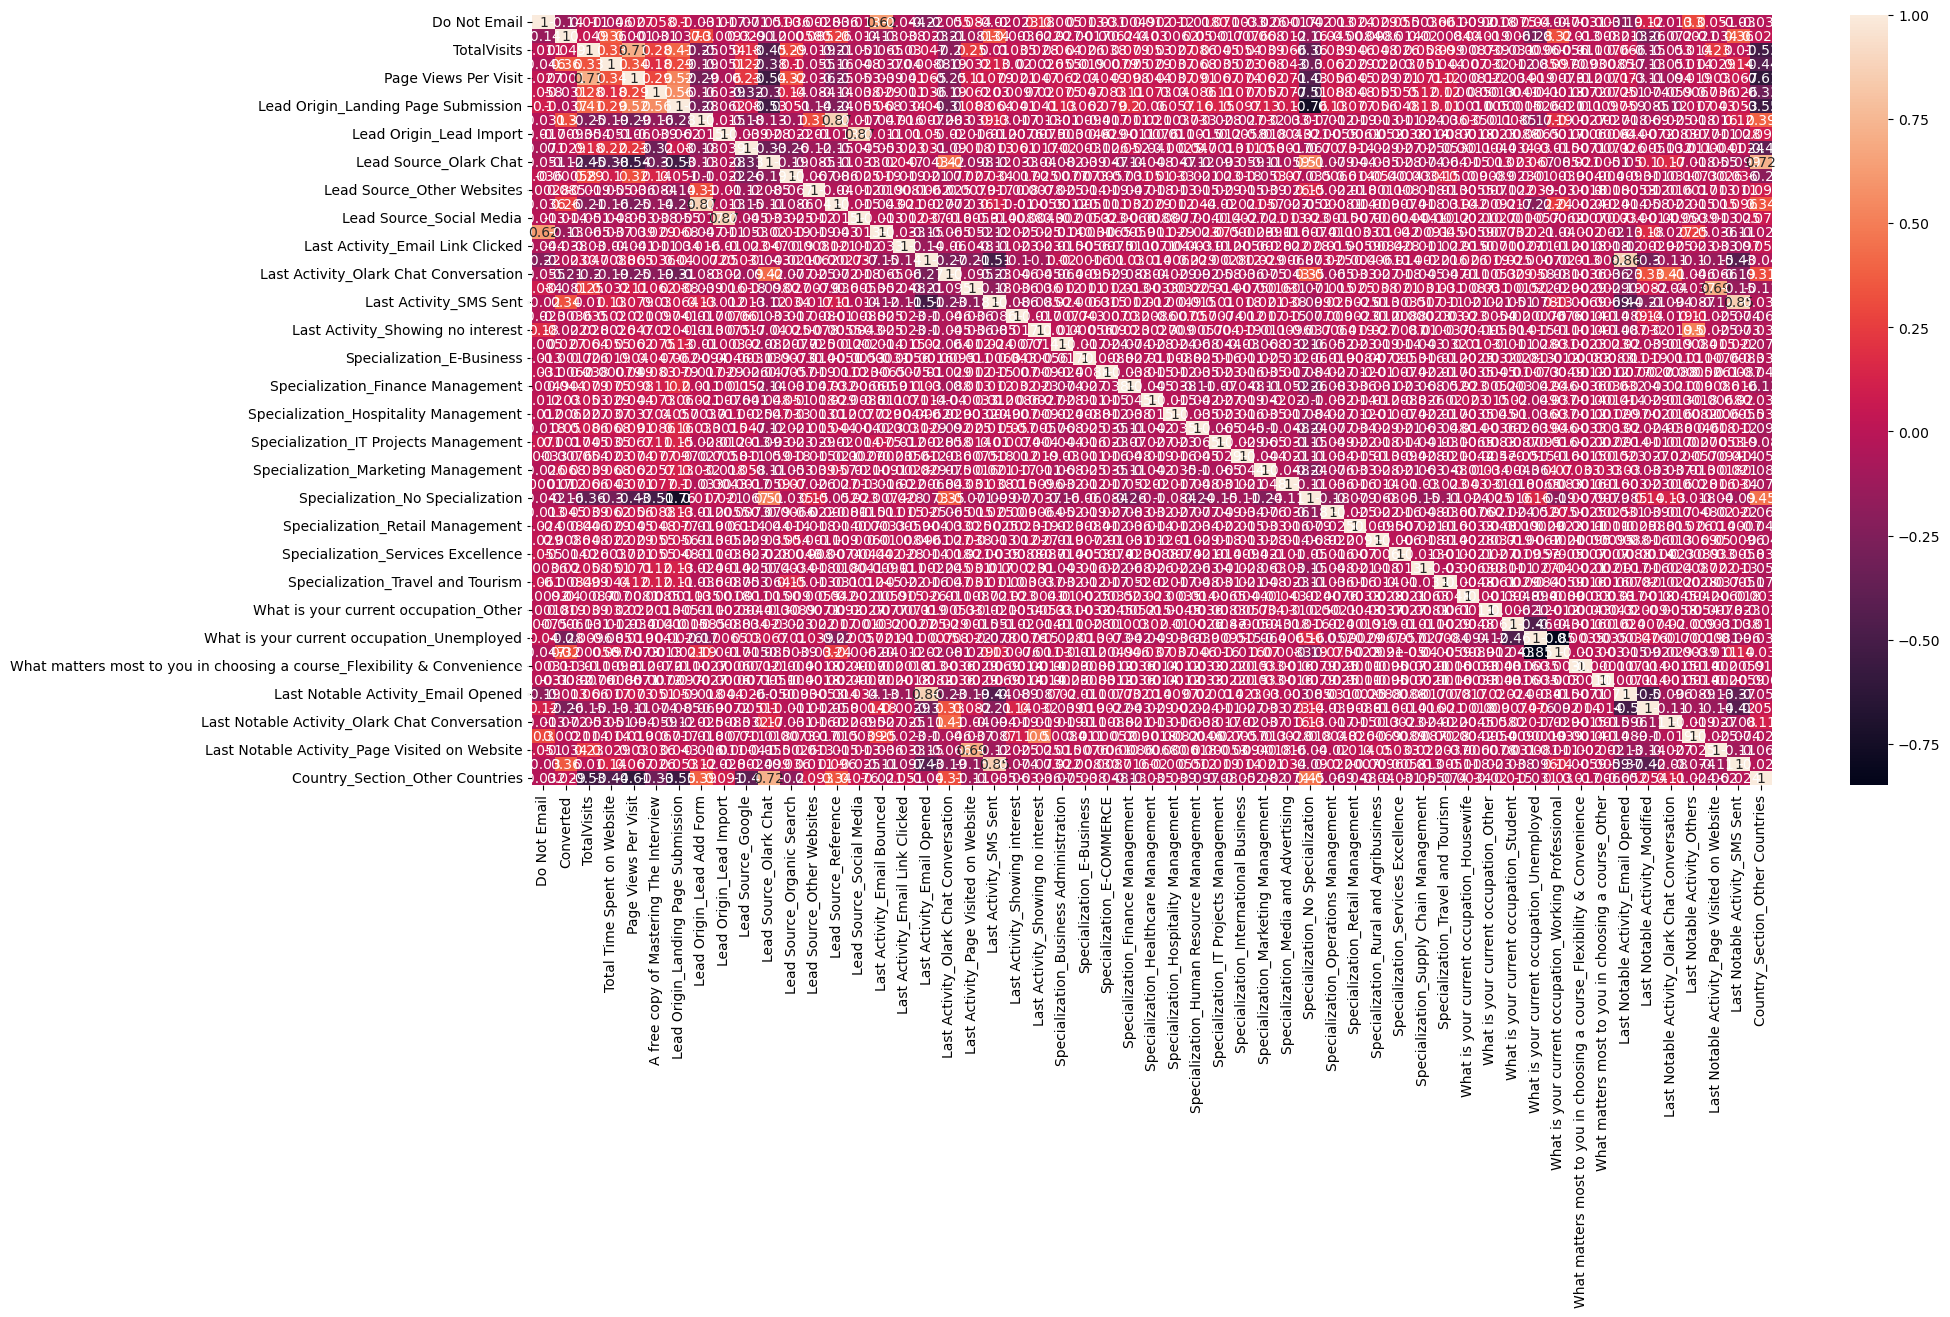

In [71]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

- Above heatmap shows very less variables which are correlated so we don't need to make any modifications

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [72]:
import statsmodels.api as sm

In [73]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.9
Date:                Tue, 18 Jul 2023   Deviance:                       5091.8
Time:                        22:51:17   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.4545      1.254     -0.363      0.717      -2.912       2.003
Do Not Email                                                               -1.5612      0.213     -7.344      0.000      -1.978      -1.145
TotalVisits                                                                 0.2697      0.052      5.208      0.000       0.168       0.371
Total Time Spent on Website                                                 1.1203      0.042     26.936      0.000       1.039       1.202
Page Views Per Visit                                                       -0.2662      0.058     -4.561      0.000      -0.381      -0.152
A free copy of Mastering The Interview                                     -0.2073      0.111     -1.870      0.062      -0.425       0.010
Lead Origin_Landing Page Submission                                        -0.9070      0.139     -6.543      0.000      -1.179      -0.635
Lead Origin_Lead Add Form                                                   4.9314      0.634      7.775      0.000       3.688       6.174
Lead Origin_Lead Import                                                     0.3343      1.037      0.322      0.747      -1.699       2.367
Lead Source_Google                                                          0.2313      0.117      1.985      0.047       0.003       0.460
Lead Source_Olark Chat                                                      0.9522      0.217      4.394      0.000       0.527       1.377
Lead Source_Organic Search                                                  0.1404      0.134      1.045      0.296      -0.123       0.404
Lead Source_Other Websites                                                  0.0697      0.333      0.209      0.834      -0.583       0.722
Lead Source_Reference                                                      -1.7693      0.658     -2.687      0.007      -3.060      -0.479
Lead Source_Social Media                                                    0.4344      0.919      0.473      0.637      -1.367       2.236
Last Activity_Email Bounced                                                -0.5377      0.552     -0.975      0.330      -1.619       0.543
Last Activity_Email Link Clicked                                            0.7254      0.433      1.675      0.094      -0.123       1.574
Last Activity_Email Opened                                                  0.9508      0.255      3.723      0.000       0.450       1.451
Last Activity_Olark Chat Conversation                                      -0.3490      0.287     -1.218      0.223      -0.911       0.213
Las

### Step 8: Feature Selection Using RFE

In [74]:
print('No of features : ', len(X_train.columns)) 

No of features :  54


In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=27)             # running RFE with 50% variables as output
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Other Websites', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 10),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Showing interest', True, 1),
 ('Last Activity_Showing no interest', True, 1),
 ('Specialization_Business Administration', False, 17),
 ('Speciali

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Websites',
       'Lead Source_Social Media', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to yo

##### Assessing the model with StatsModels

### Running 2nd Model

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.8
Date:                Tue, 18 Jul 2023   Deviance:                       5137.7
Time:                        22:51:19   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1970      0.682     -0.289      0.773      -1.534       1.140
Do Not Email                                            -1.6193      0.210     -7.707      0.000      -2.031      -1.207
Total Time Spent on Website                              1.1178      0.041     27.186      0.000       1.037       1.198
A free copy of Mastering The Interview                  -0.2794      0.089     -3.131      0.002      -0.454      -0.105
Lead Origin_Landing Page Submission                     -1.0273      0.134     -7.668      0.000      -1.290      -0.765
Lead Origin_Lead Add Form                                4.8934      0.551      8.876      0.000       3.813       5.974
Lead Origin_Lead Import                                  0.6015      0.506      1.190      0.234      -0.390       1.593
Lead Source_Olark Chat                                   0.8455      0.192      4.400      0.000       0.469       1.222
Lead Source_Reference                                   -1.8432      0.569     -3.240      0.001      -2.958      -0.728
Last Activity_Email Bounced                             -0.4555      0.546     -0.835      0.404      -1.525       0.614
Last Activity_Email Link Clicked                         0.6203      0.311      1.994      0.046       0.011       1.230
Last Activity_Email Opened                               0.9913      0.242      4.092      0.000       0.516       1.466
Last Activity_Olark Chat Conversation                   -0.3063      0.272     -1.127      0.260      -0.839       0.226
Last Activity_Page Visited on Website                    0.6958      0.264      2.635      0.008       0.178       1.213
Last Activity_SMS Sent                                   1.4520      0.254      5.721      0.000       0.955       1.949
Last Activity_Showing interest                           0.9648      0.340      2.840      0.005       0.299       1.631
Last Activity_Showing no interest                        0.6684      0.435      1.536      0.124      -0.184       1.521
Specialization_Hospitality Management                   -0.4027      0.334     -1.207      0.227      -1.056       0.251
Specialization_No Specialization                        -1.1933      0.130     -9.184      0.000      -1.448      -0.939
Specialization_Services Excellence                      -0.3949      0.661     -0.597      0.550      -1.691       0.901
What is your current occupation_Housewife               21.9537   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Student                 -0.4727      0.671     -0.705      0.481      -1.787       0.842
What is your current occupation_Unemployed              -0

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.165060
1012    0.182464
9226    0.251660
4750    0.895090
7987    0.768708
1281    0.790413
2880    0.104159
4971    0.969643
7536    0.794423
1248    0.677490
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1650604 , 0.18246376, 0.25165982, 0.89508957, 0.76870832,
       0.79041333, 0.10415866, 0.96964343, 0.79442309, 0.67748955])

##### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number
0,0,0.165060,3009
1,0,0.182464,1012
2,0,0.251660,9226
3,1,0.895090,4750
4,1,0.768708,7987
5,1,0.790413,1281
6,0,0.104159,2880
7,1,0.969643,4971
8,1,0.794423,7536
9,0,0.677490,1248


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.165060,3009,0
1,0,0.182464,1012,0
2,0,0.251660,9226,0
3,1,0.895090,4750,1
4,1,0.768708,7987,1
5,1,0.790413,1281,1
6,0,0.104159,2880,0
7,1,0.969643,4971,1
8,1,0.794423,7536,1
9,0,0.677490,1248,1


In [85]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3452  453]
 [ 696 1750]]


In [86]:
# Actual | # Predicted     not_Converted    Converted

        # not_Converted        3618            287
        # Converted            961            1485  

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8190836088804913


#### Checking VIFs

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,What is your current occupation_Unemployed,37.38
13,Last Activity_SMS Sent,11.57
10,Last Activity_Email Opened,11.22
3,Lead Origin_Landing Page Submission,7.87
25,Last Notable Activity_SMS Sent,7.37
26,Country_Section_Other Countries,6.61
4,Lead Origin_Lead Add Form,5.75
6,Lead Source_Olark Chat,5.71
17,Specialization_No Specialization,4.91
7,Lead Source_Reference,4.34


There are a few variables with high P-value but VIF is Low It's best to drop this variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'What is your current occupation_Housewife' has the highest p-Value. So let's start by dropping that.

In [90]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Showing interest', 'Last Activity_Showing no interest',
       'Specialization_Hospitality Management',
       'Specialization_No Specialization',
       'Specialization_Services Excellence',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent', 'Country_S

### 3rd Model

In [91]:
# Let's re-run the model using the selected variables - 3rd Model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.0
Date:                Tue, 18 Jul 2023   Deviance:                       5142.1
Time:                        22:51:20   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3125      0.639      0.489      0.625      -0.939       1.564
Do Not Email                                            -1.6232      0.210     -7.721      0.000      -2.035      -1.211
Total Time Spent on Website                              1.1165      0.041     27.176      0.000       1.036       1.197
A free copy of Mastering The Interview                  -0.2759      0.089     -3.094      0.002      -0.451      -0.101
Lead Origin_Landing Page Submission                     -1.0218      0.134     -7.634      0.000      -1.284      -0.759
Lead Origin_Lead Add Form                                4.8957      0.551      8.880      0.000       3.815       5.976
Lead Origin_Lead Import                                  0.6045      0.506      1.196      0.232      -0.386       1.595
Lead Source_Olark Chat                                   0.8470      0.192      4.407      0.000       0.470       1.224
Lead Source_Reference                                   -1.8380      0.569     -3.231      0.001      -2.953      -0.723
Last Activity_Email Bounced                             -0.4534      0.546     -0.831      0.406      -1.523       0.616
Last Activity_Email Link Clicked                         0.6194      0.311      1.992      0.046       0.010       1.229
Last Activity_Email Opened                               0.9902      0.242      4.088      0.000       0.515       1.465
Last Activity_Olark Chat Conversation                   -0.3086      0.272     -1.136      0.256      -0.841       0.224
Last Activity_Page Visited on Website                    0.6857      0.264      2.597      0.009       0.168       1.203
Last Activity_SMS Sent                                   1.4511      0.254      5.719      0.000       0.954       1.948
Last Activity_Showing interest                           0.9582      0.340      2.822      0.005       0.293       1.624
Last Activity_Showing no interest                        0.6668      0.435      1.532      0.125      -0.186       1.519
Specialization_Hospitality Management                   -0.4033      0.333     -1.210      0.226      -1.057       0.250
Specialization_No Specialization                        -1.1892      0.130     -9.159      0.000      -1.444      -0.935
Specialization_Services Excellence                      -0.3952      0.661     -0.598      0.550      -1.691       0.901
What is your current occupation_Student                 -0.9852      0.624     -1.578      0.115      -2.209       0.239
What is your current occupation_Unemployed              -1.4422      0.581     -2.481      0.013      -2.582      -0.303
What is your current occupation_Working Professional     1

In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3452  453]
 [ 696 1750]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8190836088804913


- Accurecy is same '0.8190836088804913' from the Previous Model
- Has A very High p-Value in 'Specialization_Services Excellence'

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,What is your current occupation_Unemployed,35.99
13,Last Activity_SMS Sent,11.45
10,Last Activity_Email Opened,10.87
3,Lead Origin_Landing Page Submission,7.83
24,Last Notable Activity_SMS Sent,7.35
25,Country_Section_Other Countries,6.61
4,Lead Origin_Lead Add Form,5.75
6,Lead Source_Olark Chat,5.71
17,Specialization_No Specialization,4.89
7,Lead Source_Reference,4.33


In [95]:
# Droping the Colomn With High p-Value
col = col.drop('Specialization_Services Excellence', 1)

### 4Th Model

In [96]:
# Let's re-run the model using the selected variables - 4th Model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.2
Date:                Tue, 18 Jul 2023   Deviance:                       5142.5
Time:                        22:51:20   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3116      0.638      0.488      0.626      -0.940       1.563
Do Not Email                                            -1.6284      0.210     -7.754      0.000      -2.040      -1.217
Total Time Spent on Website                              1.1168      0.041     27.185      0.000       1.036       1.197
A free copy of Mastering The Interview                  -0.2763      0.089     -3.098      0.002      -0.451      -0.101
Lead Origin_Landing Page Submission                     -1.0209      0.134     -7.629      0.000      -1.283      -0.759
Lead Origin_Lead Add Form                                4.8963      0.551      8.880      0.000       3.816       5.977
Lead Origin_Lead Import                                  0.6050      0.505      1.197      0.231      -0.386       1.596
Lead Source_Olark Chat                                   0.8467      0.192      4.406      0.000       0.470       1.223
Lead Source_Reference                                   -1.8409      0.569     -3.236      0.001      -2.956      -0.726
Last Activity_Email Bounced                             -0.4528      0.545     -0.830      0.406      -1.522       0.616
Last Activity_Email Link Clicked                         0.6120      0.311      1.969      0.049       0.003       1.221
Last Activity_Email Opened                               0.9907      0.242      4.090      0.000       0.516       1.465
Last Activity_Olark Chat Conversation                   -0.3111      0.272     -1.145      0.252      -0.844       0.222
Last Activity_Page Visited on Website                    0.6859      0.264      2.598      0.009       0.168       1.203
Last Activity_SMS Sent                                   1.4489      0.254      5.711      0.000       0.952       1.946
Last Activity_Showing interest                           0.9584      0.340      2.823      0.005       0.293       1.624
Last Activity_Showing no interest                        0.6670      0.435      1.533      0.125      -0.186       1.520
Specialization_Hospitality Management                   -0.4012      0.333     -1.204      0.229      -1.055       0.252
Specialization_No Specialization                        -1.1868      0.130     -9.146      0.000      -1.441      -0.932
What is your current occupation_Student                 -0.9856      0.624     -1.579      0.114      -2.209       0.238
What is your current occupation_Unemployed              -1.4438      0.581     -2.484      0.013      -2.583      -0.305
What is your current occupation_Working Professional     1.1648      0.610      1.908      0.056      -0.032       2.361
Last Notable Activity_Modified                          -0

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,What is your current occupation_Unemployed,35.98
13,Last Activity_SMS Sent,11.45
10,Last Activity_Email Opened,10.87
3,Lead Origin_Landing Page Submission,7.83
23,Last Notable Activity_SMS Sent,7.35
24,Country_Section_Other Countries,6.61
4,Lead Origin_Lead Add Form,5.75
6,Lead Source_Olark Chat,5.71
17,Specialization_No Specialization,4.89
7,Lead Source_Reference,4.33


In [98]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3450  455]
 [ 694 1752]]
0.8190836088804913


- Accurecy is same '0.8190836088804913' from the Previous Model but Insignifiacnt
- Has A very High p-Value in 'Last Activity_Email Bounced'

In [99]:
# Droping the Colomn With High p-Value
col = col.drop('Last Activity_Email Bounced', 1)

### 5Th Model

In [100]:
# Let's re-run the model using the selected variables - 5th Model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Tue, 18 Jul 2023   Deviance:                       5143.2
Time:                        22:51:21   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2377      0.634      0.375      0.708      -1.004       1.479
Do Not Email                                            -1.6874      0.199     -8.486      0.000      -2.077      -1.298
Total Time Spent on Website                              1.1174      0.041     27.196      0.000       1.037       1.198
A free copy of Mastering The Interview                  -0.2752      0.089     -3.086      0.002      -0.450      -0.100
Lead Origin_Landing Page Submission                     -1.0233      0.134     -7.651      0.000      -1.285      -0.761
Lead Origin_Lead Add Form                                4.8968      0.552      8.878      0.000       3.816       5.978
Lead Origin_Lead Import                                  0.6021      0.505      1.191      0.234      -0.389       1.593
Lead Source_Olark Chat                                   0.8421      0.192      4.384      0.000       0.466       1.219
Lead Source_Reference                                   -1.8414      0.569     -3.236      0.001      -2.957      -0.726
Last Activity_Email Link Clicked                         0.6892      0.299      2.302      0.021       0.102       1.276
Last Activity_Email Opened                               1.0677      0.227      4.695      0.000       0.622       1.513
Last Activity_Olark Chat Conversation                   -0.2328      0.258     -0.902      0.367      -0.738       0.273
Last Activity_Page Visited on Website                    0.7662      0.249      3.077      0.002       0.278       1.254
Last Activity_SMS Sent                                   1.5290      0.238      6.421      0.000       1.062       1.996
Last Activity_Showing interest                           1.0572      0.320      3.305      0.001       0.430       1.684
Last Activity_Showing no interest                        0.8555      0.367      2.333      0.020       0.137       1.574
Specialization_Hospitality Management                   -0.4078      0.332     -1.227      0.220      -1.059       0.244
Specialization_No Specialization                        -1.1868      0.130     -9.148      0.000      -1.441      -0.933
What is your current occupation_Student                 -0.9874      0.624     -1.582      0.114      -2.211       0.236
What is your current occupation_Unemployed              -1.4454      0.581     -2.488      0.013      -2.584      -0.307
What is your current occupation_Working Professional     1.1659      0.610      1.911      0.056      -0.030       2.362
Last Notable Activity_Modified                          -0.3671      0.115     -3.197      0.001      -0.592      -0.142
Last Notable Activity_Others                             1

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,31.88
12,Last Activity_SMS Sent,9.22
9,Last Activity_Email Opened,8.82
3,Lead Origin_Landing Page Submission,7.81
22,Last Notable Activity_SMS Sent,7.34
23,Country_Section_Other Countries,6.61
4,Lead Origin_Lead Add Form,5.75
6,Lead Source_Olark Chat,5.70
16,Specialization_No Specialization,4.89
7,Lead Source_Reference,4.33


In [102]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3451  454]
 [ 693 1753]]
0.8193985199181232


- Accurecy Incresed from '0.8190836088804913' from the Previous Model but Insignifiacnt
- Has A very High p-Value in 'Last Activity_Olark Chat Conversation'

In [103]:
# Droping the Colomn With High p-Value
col = col.drop('Last Activity_Olark Chat Conversation', 1)

### 6th Model

In [104]:
# Let's re-run the model using the selected variables - 6th Model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.0
Date:                Tue, 18 Jul 2023   Deviance:                       5144.0
Time:                        22:51:21   Pearson chi2:                 6.55e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0745      0.608      0.122      0.903      -1.117       1.266
Do Not Email                                            -1.6656      0.198     -8.426      0.000      -2.053      -1.278
Total Time Spent on Website                              1.1177      0.041     27.176      0.000       1.037       1.198
A free copy of Mastering The Interview                  -0.2748      0.089     -3.080      0.002      -0.450      -0.100
Lead Origin_Landing Page Submission                     -1.0187      0.134     -7.618      0.000      -1.281      -0.757
Lead Origin_Lead Add Form                                4.8911      0.551      8.872      0.000       3.811       5.972
Lead Origin_Lead Import                                  0.6011      0.506      1.189      0.234      -0.390       1.592
Lead Source_Olark Chat                                   0.8261      0.191      4.320      0.000       0.451       1.201
Lead Source_Reference                                   -1.8396      0.569     -3.234      0.001      -2.955      -0.725
Last Activity_Email Link Clicked                         0.8429      0.248      3.394      0.001       0.356       1.330
Last Activity_Email Opened                               1.2207      0.155      7.887      0.000       0.917       1.524
Last Activity_Page Visited on Website                    0.9120      0.192      4.743      0.000       0.535       1.289
Last Activity_SMS Sent                                   1.6706      0.182      9.161      0.000       1.313       2.028
Last Activity_Showing interest                           1.1905      0.286      4.162      0.000       0.630       1.751
Last Activity_Showing no interest                        0.9546      0.354      2.698      0.007       0.261       1.648
Specialization_Hospitality Management                   -0.4030      0.333     -1.211      0.226      -1.055       0.249
Specialization_No Specialization                        -1.1858      0.130     -9.141      0.000      -1.440      -0.932
What is your current occupation_Student                 -0.9829      0.624     -1.574      0.115      -2.207       0.241
What is your current occupation_Unemployed              -1.4376      0.581     -2.473      0.013      -2.577      -0.298
What is your current occupation_Working Professional     1.1812      0.610      1.935      0.053      -0.015       2.378
Last Notable Activity_Modified                          -0.3562      0.114     -3.127      0.002      -0.579      -0.133
Last Notable Activity_Others                             1.8472      0.362      5.098      0.000       1.137       2.557
Last Notable Activity_SMS Sent                           1

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,23.76
3,Lead Origin_Landing Page Submission,7.80
21,Last Notable Activity_SMS Sent,7.31
11,Last Activity_SMS Sent,6.91
22,Country_Section_Other Countries,6.61
4,Lead Origin_Lead Add Form,5.75
6,Lead Source_Olark Chat,5.57
9,Last Activity_Email Opened,5.22
15,Specialization_No Specialization,4.88
7,Lead Source_Reference,4.33


In [106]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3452  453]
 [ 703 1743]]
0.8179814202487797


- Accurecy did Droped from '0.8193985199181232' from the Previous Model but Insignifiacnt
- Has A very High p-Value in 'Lead Origin_Lead Import'

In [107]:
# Droping the Colomn With High p-Value
col = col.drop('Lead Origin_Lead Import', 1)

### 7th Model

In [108]:
# Let's re-run the model using the selected variables - 7th Model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.7
Date:                Tue, 18 Jul 2023   Deviance:                       5145.3
Time:                        22:51:21   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0945      0.609      0.155      0.877      -1.098       1.287
Do Not Email                                            -1.6669      0.198     -8.434      0.000      -2.054      -1.280
Total Time Spent on Website                              1.1141      0.041     27.188      0.000       1.034       1.194
A free copy of Mastering The Interview                  -0.2778      0.089     -3.118      0.002      -0.452      -0.103
Lead Origin_Landing Page Submission                     -1.0473      0.132     -7.955      0.000      -1.305      -0.789
Lead Origin_Lead Add Form                                4.8193      0.548      8.799      0.000       3.746       5.893
Lead Source_Olark Chat                                   0.7557      0.181      4.172      0.000       0.401       1.111
Lead Source_Reference                                   -1.8483      0.569     -3.249      0.001      -2.963      -0.733
Last Activity_Email Link Clicked                         0.8428      0.248      3.394      0.001       0.356       1.330
Last Activity_Email Opened                               1.2259      0.155      7.925      0.000       0.923       1.529
Last Activity_Page Visited on Website                    0.9133      0.192      4.751      0.000       0.537       1.290
Last Activity_SMS Sent                                   1.6780      0.182      9.208      0.000       1.321       2.035
Last Activity_Showing interest                           1.1931      0.286      4.173      0.000       0.633       1.753
Last Activity_Showing no interest                        0.9561      0.354      2.702      0.007       0.262       1.650
Specialization_Hospitality Management                   -0.4039      0.333     -1.214      0.225      -1.056       0.248
Specialization_No Specialization                        -1.2080      0.129     -9.390      0.000      -1.460      -0.956
What is your current occupation_Student                 -0.9791      0.625     -1.566      0.117      -2.204       0.246
What is your current occupation_Unemployed              -1.4311      0.582     -2.459      0.014      -2.572      -0.290
What is your current occupation_Working Professional     1.1842      0.611      1.937      0.053      -0.014       2.382
Last Notable Activity_Modified                          -0.3576      0.114     -3.140      0.002      -0.581      -0.134
Last Notable Activity_Others                             1.8459      0.363      5.092      0.000       1.135       2.556
Last Notable Activity_SMS Sent                           1.0022      0.187      5.371      0.000       0.636       1.368
Country_Section_Other Countries                          0

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,23.55
3,Lead Origin_Landing Page Submission,7.63
20,Last Notable Activity_SMS Sent,7.31
10,Last Activity_SMS Sent,6.90
21,Country_Section_Other Countries,6.11
4,Lead Origin_Lead Add Form,5.59
8,Last Activity_Email Opened,5.21
5,Lead Source_Olark Chat,5.15
14,Specialization_No Specialization,4.82
6,Lead Source_Reference,4.33


In [110]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3451  454]
 [ 691 1755]]
0.819713430955755


- Accurecy Incresed from '0.8179814202487797' from the Previous Model but Insignifiacnt
- Has A very High p-Value in 'Specialization_Hospitality Management'

In [111]:
# Droping the Colomn With High p-Value
col = col.drop('Specialization_Hospitality Management', 1)

### 8Th Model

In [112]:
# Let's re-run the model using the selected variables - 8th Model
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.4
Date:                Tue, 18 Jul 2023   Deviance:                       5146.8
Time:                        22:51:22   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0922      0.608      0.152      0.879      -1.100       1.284
Do Not Email                                            -1.6686      0.198     -8.446      0.000      -2.056      -1.281
Total Time Spent on Website                              1.1125      0.041     27.180      0.000       1.032       1.193
A free copy of Mastering The Interview                  -0.2786      0.089     -3.126      0.002      -0.453      -0.104
Lead Origin_Landing Page Submission                     -1.0463      0.132     -7.947      0.000      -1.304      -0.788
Lead Origin_Lead Add Form                                4.8164      0.548      8.793      0.000       3.743       5.890
Lead Source_Olark Chat                                   0.7523      0.181      4.156      0.000       0.398       1.107
Lead Source_Reference                                   -1.8585      0.569     -3.268      0.001      -2.973      -0.744
Last Activity_Email Link Clicked                         0.8437      0.248      3.397      0.001       0.357       1.330
Last Activity_Email Opened                               1.2269      0.155      7.931      0.000       0.924       1.530
Last Activity_Page Visited on Website                    0.9192      0.192      4.785      0.000       0.543       1.296
Last Activity_SMS Sent                                   1.6783      0.182      9.211      0.000       1.321       2.035
Last Activity_Showing interest                           1.2026      0.286      4.210      0.000       0.643       1.763
Last Activity_Showing no interest                        0.9610      0.353      2.720      0.007       0.269       1.653
Specialization_No Specialization                        -1.2002      0.128     -9.342      0.000      -1.452      -0.948
What is your current occupation_Student                 -0.9869      0.624     -1.581      0.114      -2.211       0.237
What is your current occupation_Unemployed              -1.4361      0.581     -2.470      0.013      -2.575      -0.297
What is your current occupation_Working Professional     1.1733      0.611      1.922      0.055      -0.023       2.370
Last Notable Activity_Modified                          -0.3592      0.114     -3.153      0.002      -0.582      -0.136
Last Notable Activity_Others                             1.8394      0.362      5.081      0.000       1.130       2.549
Last Notable Activity_SMS Sent                           1.0032      0.187      5.377      0.000       0.638       1.369
Country_Section_Other Countries                          0.3601      0.159      2.267      0.023       0.049       0.671
==========================================================

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,23.52
3,Lead Origin_Landing Page Submission,7.63
19,Last Notable Activity_SMS Sent,7.31
10,Last Activity_SMS Sent,6.90
20,Country_Section_Other Countries,6.11
4,Lead Origin_Lead Add Form,5.59
8,Last Activity_Email Opened,5.21
5,Lead Source_Olark Chat,5.15
13,Specialization_No Specialization,4.81
6,Lead Source_Reference,4.33


In [114]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3454  451]
 [ 696 1750]]
0.8193985199181232


- Accurecy did Decresed from '0.819713430955755' from the Previous Model but Insignifiacnt
- Has A very High p-Value in 'What is your current occupation_Student'

In [115]:
# Droping the Colomn With High p-Value
col = col.drop('What is your current occupation_Student', 1)

### 9th Model

In [116]:
# Let's re-run the model using the selected variables - 9th Model
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.7
Date:                Tue, 18 Jul 2023   Deviance:                       5149.4
Time:                        22:51:22   Pearson chi2:                 6.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7455      0.284     -2.626      0.009      -1.302      -0.189
Do Not Email                                            -1.6650      0.197     -8.438      0.000      -2.052      -1.278
Total Time Spent on Website                              1.1130      0.041     27.203      0.000       1.033       1.193
A free copy of Mastering The Interview                  -0.2782      0.089     -3.124      0.002      -0.453      -0.104
Lead Origin_Landing Page Submission                     -1.0576      0.131     -8.044      0.000      -1.315      -0.800
Lead Origin_Lead Add Form                                4.8159      0.548      8.793      0.000       3.742       5.889
Lead Source_Olark Chat                                   0.7481      0.181      4.134      0.000       0.393       1.103
Lead Source_Reference                                   -1.8567      0.569     -3.265      0.001      -2.971      -0.742
Last Activity_Email Link Clicked                         0.8438      0.248      3.400      0.001       0.357       1.330
Last Activity_Email Opened                               1.2290      0.155      7.951      0.000       0.926       1.532
Last Activity_Page Visited on Website                    0.9307      0.192      4.852      0.000       0.555       1.307
Last Activity_SMS Sent                                   1.6796      0.182      9.222      0.000       1.323       2.037
Last Activity_Showing interest                           1.2124      0.286      4.240      0.000       0.652       1.773
Last Activity_Showing no interest                        0.9655      0.353      2.735      0.006       0.274       1.657
Specialization_No Specialization                        -1.2100      0.128     -9.426      0.000      -1.462      -0.958
What is your current occupation_Unemployed              -0.5909      0.214     -2.761      0.006      -1.010      -0.172
What is your current occupation_Working Professional     2.0174      0.285      7.076      0.000       1.459       2.576
Last Notable Activity_Modified                          -0.3573      0.114     -3.140      0.002      -0.580      -0.134
Last Notable Activity_Others                             1.8362      0.362      5.075      0.000       1.127       2.545
Last Notable Activity_SMS Sent                           1.0036      0.186      5.381      0.000       0.638       1.369
Country_Section_Other Countries                          0.3594      0.159      2.263      0.024       0.048       0.671
========================================================================================================================
"""

- Now that P-Value is Low check the VIF for any Multicoliniarity

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,15.50
18,Last Notable Activity_SMS Sent,7.05
10,Last Activity_SMS Sent,6.81
3,Lead Origin_Landing Page Submission,6.58
19,Country_Section_Other Countries,6.11
4,Lead Origin_Lead Add Form,5.58
5,Lead Source_Olark Chat,5.04
8,Last Activity_Email Opened,4.38
6,Lead Source_Reference,4.30
13,Specialization_No Specialization,4.16


In [118]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3457  448]
 [ 695 1751]]
0.8200283419933869


- Accurecy did Incresed from '0.8193985199181232' from the Previous Model but signifiacnt
- Has A very High VIF in 'What is your current occupation_Unemployed'

In [119]:
# Droping the Colomn With High VIF
col = col.drop('What is your current occupation_Unemployed', 1)

### 10th Model

In [120]:
# Let's re-run the model using the selected variables - 10th Model
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.4
Date:                Tue, 18 Jul 2023   Deviance:                       5156.9
Time:                        22:51:22   Pearson chi2:                 6.59e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3078      0.198     -6.618      0.000      -1.695      -0.920
Do Not Email                                            -1.6592      0.197     -8.403      0.000      -2.046      -1.272
Total Time Spent on Website                              1.1133      0.041     27.222      0.000       1.033       1.193
A free copy of Mastering The Interview                  -0.2760      0.089     -3.104      0.002      -0.450      -0.102
Lead Origin_Landing Page Submission                     -1.0618      0.132     -8.073      0.000      -1.320      -0.804
Lead Origin_Lead Add Form                                4.8085      0.548      8.780      0.000       3.735       5.882
Lead Source_Olark Chat                                   0.7557      0.181      4.177      0.000       0.401       1.110
Lead Source_Reference                                   -1.8368      0.569     -3.230      0.001      -2.951      -0.722
Last Activity_Email Link Clicked                         0.8394      0.248      3.383      0.001       0.353       1.326
Last Activity_Email Opened                               1.2280      0.155      7.946      0.000       0.925       1.531
Last Activity_Page Visited on Website                    0.9279      0.192      4.834      0.000       0.552       1.304
Last Activity_SMS Sent                                   1.6638      0.182      9.151      0.000       1.307       2.020
Last Activity_Showing interest                           1.1971      0.286      4.184      0.000       0.636       1.758
Last Activity_Showing no interest                        0.9494      0.353      2.692      0.007       0.258       1.641
Specialization_No Specialization                        -1.2203      0.128     -9.498      0.000      -1.472      -0.968
What is your current occupation_Working Professional     2.5896      0.196     13.190      0.000       2.205       2.974
Last Notable Activity_Modified                          -0.3627      0.114     -3.188      0.001      -0.586      -0.140
Last Notable Activity_Others                             1.8260      0.362      5.048      0.000       1.117       2.535
Last Notable Activity_SMS Sent                           1.0021      0.186      5.377      0.000       0.637       1.367
Country_Section_Other Countries                          0.3590      0.159      2.261      0.024       0.048       0.670
========================================================================================================================
"""

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,6.62
10,Last Activity_SMS Sent,6.52
18,Country_Section_Other Countries,6.11
4,Lead Origin_Lead Add Form,5.57
3,Lead Origin_Landing Page Submission,5.21
5,Lead Source_Olark Chat,4.92
6,Lead Source_Reference,4.27
13,Specialization_No Specialization,3.21
8,Last Activity_Email Opened,2.84
15,Last Notable Activity_Modified,2.61


In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3455  450]
 [ 698 1748]]
0.8192410643993072


- Accurecy did Decresed from '0.8200283419933869' from the Previous Model but Insignifiacnt
- Has A very High VIF in 'Last Notable Activity_SMS Sent' but instead Going with 'Country_Section_Other Countries' as it has Higer p-value & almost same VIF. Going Bold.

In [123]:
# Droping the Colomn With High VIF
col = col.drop('Country_Section_Other Countries', 1)

### 11th Model

In [124]:
# Let's re-run the model using the selected variables - 11th Model
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Tue, 18 Jul 2023   Deviance:                       5161.9
Time:                        22:51:23   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3073      0.198     -6.609      0.000      -1.695      -0.920
Do Not Email                                            -1.6487      0.197     -8.355      0.000      -2.035      -1.262
Total Time Spent on Website                              1.1043      0.041     27.170      0.000       1.025       1.184
A free copy of Mastering The Interview                  -0.2722      0.089     -3.063      0.002      -0.446      -0.098
Lead Origin_Landing Page Submission                     -1.0395      0.131     -7.920      0.000      -1.297      -0.782
Lead Origin_Lead Add Form                                5.1239      0.530      9.667      0.000       4.085       6.163
Lead Source_Olark Chat                                   1.0608      0.122      8.677      0.000       0.821       1.300
Lead Source_Reference                                   -1.8242      0.569     -3.209      0.001      -2.938      -0.710
Last Activity_Email Link Clicked                         0.8389      0.248      3.383      0.001       0.353       1.325
Last Activity_Email Opened                               1.2234      0.155      7.915      0.000       0.920       1.526
Last Activity_Page Visited on Website                    0.9177      0.192      4.786      0.000       0.542       1.293
Last Activity_SMS Sent                                   1.6552      0.182      9.111      0.000       1.299       2.011
Last Activity_Showing interest                           1.1702      0.286      4.088      0.000       0.609       1.731
Last Activity_Showing no interest                        0.9372      0.352      2.664      0.008       0.248       1.627
Specialization_No Specialization                        -1.1852      0.128     -9.290      0.000      -1.435      -0.935
What is your current occupation_Working Professional     2.6094      0.196     13.314      0.000       2.225       2.994
Last Notable Activity_Modified                          -0.3588      0.114     -3.156      0.002      -0.582      -0.136
Last Notable Activity_Others                             1.8195      0.361      5.045      0.000       1.113       2.526
Last Notable Activity_SMS Sent                           1.0065      0.186      5.406      0.000       0.642       1.371
========================================================================================================================
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,6.62
10,Last Activity_SMS Sent,6.52
3,Lead Origin_Landing Page Submission,5.16
4,Lead Origin_Lead Add Form,4.48
6,Lead Source_Reference,4.27
13,Specialization_No Specialization,3.14
8,Last Activity_Email Opened,2.84
15,Last Notable Activity_Modified,2.61
2,A free copy of Mastering The Interview,2.17
5,Lead Source_Olark Chat,1.97


In [126]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3455  450]
 [ 709 1737]]
0.817509053692332


- Accurecy Decresed further from '0.8192410643993072' from the Previous Model though Insignifiacnt
- Has A very High VIF in 'Last Notable Activity_SMS Sent'

In [127]:
# Droping the Colomn With High VIF
col = col.drop('Last Notable Activity_SMS Sent', 1)

### 12th Model

In [128]:
# Let's re-run the model using the selected variables - 12th Model
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.8
Date:                Tue, 18 Jul 2023   Deviance:                       5191.5
Time:                        22:51:23   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4029
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9855      0.189     -5.214      0.000      -1.356      -0.615
Do Not Email                                            -1.6422      0.196     -8.360      0.000      -2.027      -1.257
Total Time Spent on Website                              1.1068      0.041     27.269      0.000       1.027       1.186
A free copy of Mastering The Interview                  -0.2815      0.088     -3.183      0.001      -0.455      -0.108
Lead Origin_Landing Page Submission                     -1.0329      0.131     -7.888      0.000      -1.290      -0.776
Lead Origin_Lead Add Form                                5.0860      0.528      9.639      0.000       4.052       6.120
Lead Source_Olark Chat                                   1.0691      0.122      8.758      0.000       0.830       1.308
Lead Source_Reference                                   -1.7771      0.566     -3.138      0.002      -2.887      -0.667
Last Activity_Email Link Clicked                         0.6217      0.246      2.529      0.011       0.140       1.104
Last Activity_Email Opened                               0.9628      0.147      6.530      0.000       0.674       1.252
Last Activity_Page Visited on Website                    0.7729      0.191      4.042      0.000       0.398       1.148
Last Activity_SMS Sent                                   2.2086      0.148     14.931      0.000       1.919       2.499
Last Activity_Showing interest                           1.2304      0.287      4.291      0.000       0.668       1.792
Last Activity_Showing no interest                        0.9833      0.354      2.781      0.005       0.290       1.676
Specialization_No Specialization                        -1.1891      0.127     -9.334      0.000      -1.439      -0.939
What is your current occupation_Working Professional     2.6279      0.196     13.392      0.000       2.243       3.013
Last Notable Activity_Modified                          -0.7489      0.090     -8.304      0.000      -0.926      -0.572
Last Notable Activity_Others                             1.4576      0.356      4.095      0.000       0.760       2.155
========================================================================================================================
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.87
4,Lead Origin_Lead Add Form,4.48
6,Lead Source_Reference,4.26
13,Specialization_No Specialization,2.96
8,Last Activity_Email Opened,2.73
10,Last Activity_SMS Sent,2.58
2,A free copy of Mastering The Interview,2.17
5,Lead Source_Olark Chat,1.94
15,Last Notable Activity_Modified,1.92
16,Last Notable Activity_Others,1.54


In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3457  448]
 [ 705 1741]]
0.8184537868052275


- Accurecy did Incresed from '0.817509053692332' from the Previous Model but Insignifiacnt
- Has A High p-value in 'Last Activity_Email Link Clicked'

In [131]:
# Droping the Colomn With High VIF
col = col.drop('Last Activity_Email Link Clicked', 1)

### 13th Model

In [132]:
# Let's re-run the model using the selected variables - 13th Model
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.8
Date:                Tue, 18 Jul 2023   Deviance:                       5197.7
Time:                        22:51:23   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8031      0.173     -4.653      0.000      -1.141      -0.465
Do Not Email                                            -1.6685      0.196     -8.515      0.000      -2.053      -1.284
Total Time Spent on Website                              1.1065      0.041     27.258      0.000       1.027       1.186
A free copy of Mastering The Interview                  -0.2841      0.088     -3.212      0.001      -0.458      -0.111
Lead Origin_Landing Page Submission                     -1.0298      0.131     -7.870      0.000      -1.286      -0.773
Lead Origin_Lead Add Form                                5.1241      0.529      9.691      0.000       4.088       6.160
Lead Source_Olark Chat                                   1.0638      0.122      8.718      0.000       0.825       1.303
Lead Source_Reference                                   -1.7732      0.568     -3.123      0.002      -2.886      -0.660
Last Activity_Email Opened                               0.7902      0.128      6.193      0.000       0.540       1.040
Last Activity_Page Visited on Website                    0.6143      0.178      3.442      0.001       0.265       0.964
Last Activity_SMS Sent                                   2.0400      0.129     15.837      0.000       1.788       2.293
Last Activity_Showing interest                           1.1011      0.280      3.927      0.000       0.552       1.651
Last Activity_Showing no interest                        0.8865      0.348      2.546      0.011       0.204       1.569
Specialization_No Specialization                        -1.2008      0.127     -9.435      0.000      -1.450      -0.951
What is your current occupation_Working Professional     2.6224      0.196     13.390      0.000       2.239       3.006
Last Notable Activity_Modified                          -0.7941      0.089     -8.952      0.000      -0.968      -0.620
Last Notable Activity_Others                             1.3675      0.351      3.893      0.000       0.679       2.056
========================================================================================================================
"""

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.58
4,Lead Origin_Lead Add Form,4.47
6,Lead Source_Reference,4.26
12,Specialization_No Specialization,2.85
7,Last Activity_Email Opened,2.55
9,Last Activity_SMS Sent,2.43
2,A free copy of Mastering The Interview,2.17
5,Lead Source_Olark Chat,1.92
14,Last Notable Activity_Modified,1.91
15,Last Notable Activity_Others,1.54


In [134]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3462  443]
 [ 713 1733]]
0.8179814202487797


- This Time Accurecy Decresed from '0.8184537868052275' from the Previous Model but Signifiacntly
- Has A very low VIF But a Sudden Jump in P-Value of 'Lead Origin_Landing Page Submission'

In [135]:
# Droping the Colomn With High VIF
col = col.drop('Lead Origin_Landing Page Submission', 1)

### 14th Model

In [136]:
# Let's re-run the model using the selected variables - 11th Model
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.6
Date:                Tue, 18 Jul 2023   Deviance:                       5261.2
Time:                        22:51:23   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6337      0.137    -11.903      0.000      -1.903      -1.365
Do Not Email                                            -1.7013      0.194     -8.768      0.000      -2.082      -1.321
Total Time Spent on Website                              1.1226      0.040     27.772      0.000       1.043       1.202
A free copy of Mastering The Interview                  -0.4389      0.086     -5.119      0.000      -0.607      -0.271
Lead Origin_Lead Add Form                                5.3750      0.527     10.199      0.000       4.342       6.408
Lead Source_Olark Chat                                   1.3667      0.116     11.759      0.000       1.139       1.595
Lead Source_Reference                                   -1.4727      0.565     -2.605      0.009      -2.581      -0.364
Last Activity_Email Opened                               0.7982      0.126      6.311      0.000       0.550       1.046
Last Activity_Page Visited on Website                    0.6016      0.178      3.386      0.001       0.253       0.950
Last Activity_SMS Sent                                   2.0116      0.128     15.759      0.000       1.761       2.262
Last Activity_Showing interest                           1.1278      0.278      4.053      0.000       0.582       1.673
Last Activity_Showing no interest                        0.8516      0.343      2.480      0.013       0.179       1.525
Specialization_No Specialization                        -0.5592      0.096     -5.829      0.000      -0.747      -0.371
What is your current occupation_Working Professional     2.6621      0.191     13.909      0.000       2.287       3.037
Last Notable Activity_Modified                          -0.7820      0.088     -8.898      0.000      -0.954      -0.610
Last Notable Activity_Others                             1.4386      0.346      4.155      0.000       0.760       2.117
========================================================================================================================
"""

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,4.42
5,Lead Source_Reference,4.24
11,Specialization_No Specialization,2.44
4,Lead Source_Olark Chat,1.89
2,A free copy of Mastering The Interview,1.78
8,Last Activity_SMS Sent,1.62
13,Last Notable Activity_Modified,1.61
6,Last Activity_Email Opened,1.60
14,Last Notable Activity_Others,1.53
10,Last Activity_Showing no interest,1.36


In [138]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3467  438]
 [ 717 1729]]
0.8181388757675957


- Accurecy did Dicresed from '0.7989293024720516' from the Previous Model but insignifiacntly
- Has A very high VIF 'Lead Origin_Lead Add Form'

In [139]:
# Droping the Colomn With High VIF
col = col.drop('Lead Origin_Lead Add Form', 1)

### 15th Model

In [140]:
# Let's re-run the model using the selected variables - 11th Model
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.6
Date:                Tue, 18 Jul 2023   Deviance:                       5589.1
Time:                        22:51:24   Pearson chi2:                 6.45e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5851      0.133    -11.885      0.000      -1.847      -1.324
Do Not Email                                            -1.5391      0.184     -8.384      0.000      -1.899      -1.179
Total Time Spent on Website                              0.9961      0.038     26.069      0.000       0.921       1.071
A free copy of Mastering The Interview                  -0.4829      0.084     -5.771      0.000      -0.647      -0.319
Lead Source_Olark Chat                                   0.8930      0.107      8.324      0.000       0.683       1.103
Lead Source_Reference                                    3.5547      0.229     15.527      0.000       3.106       4.003
Last Activity_Email Opened                               0.8555      0.123      6.969      0.000       0.615       1.096
Last Activity_Page Visited on Website                    0.6348      0.170      3.724      0.000       0.301       0.969
Last Activity_SMS Sent                                   2.0928      0.124     16.903      0.000       1.850       2.335
Last Activity_Showing interest                           1.1519      0.271      4.244      0.000       0.620       1.684
Last Activity_Showing no interest                        0.7901      0.334      2.369      0.018       0.136       1.444
Specialization_No Specialization                        -0.2285      0.090     -2.533      0.011      -0.405      -0.052
What is your current occupation_Working Professional     2.5916      0.188     13.793      0.000       2.223       2.960
Last Notable Activity_Modified                          -0.7803      0.085     -9.230      0.000      -0.946      -0.615
Last Notable Activity_Others                             1.3865      0.334      4.149      0.000       0.731       2.042
========================================================================================================================
"""

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_No Specialization,2.37
3,Lead Source_Olark Chat,1.83
2,A free copy of Mastering The Interview,1.78
12,Last Notable Activity_Modified,1.61
5,Last Activity_Email Opened,1.60
7,Last Activity_SMS Sent,1.59
13,Last Notable Activity_Others,1.53
9,Last Activity_Showing no interest,1.36
1,Total Time Spent on Website,1.29
0,Do Not Email,1.27


In [142]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3432  473]
 [ 812 1634]]
0.7976696583215241


- Accurecy did Incresed from '$0.8181388757675957$' from the Previous Model but $Signifiacntly$
- Has A very low VIF & a low P-Value of 'Last Activity_Showing no interest'

In [143]:
# Droping the Colomn With High VIF
col = col.drop('Last Activity_Showing no interest', 1)

### 16th MOdel

In [144]:
# Let's re-run the model using the selected variables - 11th Model
X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.2
Date:                Tue, 18 Jul 2023   Deviance:                       5594.4
Time:                        22:51:24   Pearson chi2:                 6.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3638
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5422      0.132    -11.723      0.000      -1.800      -1.284
Do Not Email                                            -1.5650      0.184     -8.498      0.000      -1.926      -1.204
Total Time Spent on Website                              0.9955      0.038     26.067      0.000       0.921       1.070
A free copy of Mastering The Interview                  -0.4838      0.084     -5.782      0.000      -0.648      -0.320
Lead Source_Olark Chat                                   0.8850      0.107      8.261      0.000       0.675       1.095
Lead Source_Reference                                    3.5618      0.229     15.550      0.000       3.113       4.011
Last Activity_Email Opened                               0.8158      0.121      6.743      0.000       0.579       1.053
Last Activity_Page Visited on Website                    0.5932      0.169      3.508      0.000       0.262       0.925
Last Activity_SMS Sent                                   2.0537      0.122     16.822      0.000       1.814       2.293
Last Activity_Showing interest                           1.0444      0.270      3.868      0.000       0.515       1.574
Specialization_No Specialization                        -0.2362      0.090     -2.622      0.009      -0.413      -0.060
What is your current occupation_Working Professional     2.5826      0.187     13.782      0.000       2.215       2.950
Last Notable Activity_Modified                          -0.7717      0.084     -9.151      0.000      -0.937      -0.606
Last Notable Activity_Others                             1.7930      0.283      6.337      0.000       1.239       2.348
========================================================================================================================
"""

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_No Specialization,2.37
3,Lead Source_Olark Chat,1.83
2,A free copy of Mastering The Interview,1.77
5,Last Activity_Email Opened,1.59
7,Last Activity_SMS Sent,1.58
11,Last Notable Activity_Modified,1.58
1,Total Time Spent on Website,1.29
0,Do Not Email,1.27
4,Lead Source_Reference,1.25
10,What is your current occupation_Working Profes...,1.20


In [146]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3432  473]
 [ 811 1635]]
0.7978271138403401


- Accurecy Droped slightly from '0.7976696583215241' from the Previous Model
- Has A very low VIF & a low P-Value of 'Specialization_No Specialization'

In [147]:
# Droping the Colomn With High VIF
col = col.drop('Specialization_No Specialization', 1)

### 17th Model

In [148]:
# Let's re-run the model using the selected variables - 17th Model
X_train_sm = sm.add_constant(X_train[col])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2800.7
Date:                Tue, 18 Jul 2023   Deviance:                       5601.3
Time:                        22:51:24   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3631
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6605      0.124    -13.434      0.000      -1.903      -1.418
Do Not Email                                            -1.5563      0.185     -8.433      0.000      -1.918      -1.195
Total Time Spent on Website                              1.0050      0.038     26.413      0.000       0.930       1.080
A free copy of Mastering The Interview                  -0.3903      0.076     -5.143      0.000      -0.539      -0.242
Lead Source_Olark Chat                                   0.7888      0.100      7.893      0.000       0.593       0.985
Lead Source_Reference                                    3.5838      0.229     15.624      0.000       3.134       4.033
Last Activity_Email Opened                               0.8404      0.120      6.981      0.000       0.604       1.076
Last Activity_Page Visited on Website                    0.6151      0.169      3.645      0.000       0.284       0.946
Last Activity_SMS Sent                                   2.0734      0.122     17.032      0.000       1.835       2.312
Last Activity_Showing interest                           1.1094      0.270      4.116      0.000       0.581       1.638
What is your current occupation_Working Professional     2.6325      0.186     14.138      0.000       2.268       2.997
Last Notable Activity_Modified                          -0.7767      0.084     -9.222      0.000      -0.942      -0.612
Last Notable Activity_Others                             1.8021      0.283      6.379      0.000       1.248       2.356
========================================================================================================================
"""

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,A free copy of Mastering The Interview,1.56
3,Lead Source_Olark Chat,1.43
10,Last Notable Activity_Modified,1.41
7,Last Activity_SMS Sent,1.39
5,Last Activity_Email Opened,1.38
1,Total Time Spent on Website,1.28
0,Do Not Email,1.27
4,Lead Source_Reference,1.25
9,What is your current occupation_Working Profes...,1.18
11,Last Notable Activity_Others,1.17


In [150]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3436  469]
 [ 808 1638]]
0.7989293024720516


In [151]:
# Actual | # Predicted     not_Converted    Converted

        # not_Converted        3436            469
        # Converted            808            1638  

- Accurecy Slightly Deresed from '0.7978271138403401' from the Previous Model but Insignificantly
- But the features that remain are statistically significant and donot show any multi collinearity.
- We are Selecting Model no. 17 as our Final Model

## Metrics beyond simply accuracy

In [152]:
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negatives
TP = confusion[1,1] # True Positive

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.669664758789861

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798975672215109

In [155]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12010243277848912


In [156]:
# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.7774086378737541
0.8096135721017907


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

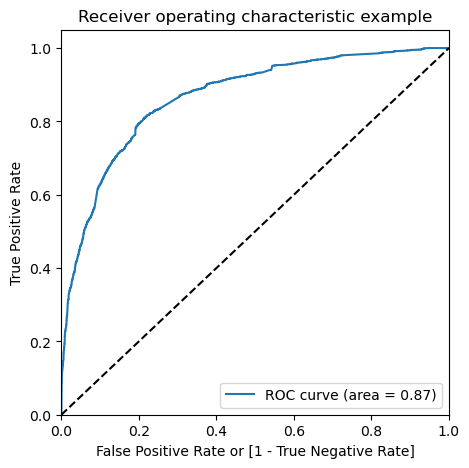

In [159]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [160]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202559,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.662410,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.384427,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.888451,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.842433,7987,1,1,1,1,1,1,1,1,1,1,0


In [161]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.573925  0.970155  0.325736
0.2   0.2  0.712644  0.908831  0.589757
0.3   0.3  0.785388  0.829926  0.757490
0.4   0.4  0.794206  0.742845  0.826376
0.5   0.5  0.798929  0.669665  0.879898
0.6   0.6  0.777200  0.546607  0.921639
0.7   0.7  0.763817  0.471791  0.946735
0.8   0.8  0.740356  0.372036  0.971063
0.9   0.9  0.696426  0.228536  0.989501


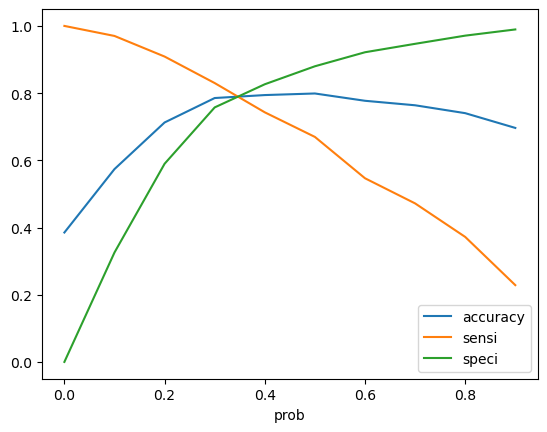

In [162]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [163]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.202559,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.662410,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.384427,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.888451,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.842433,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [164]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7981420248779719

In [165]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3138,  767],
       [ 515, 1931]], dtype=int64)

In [166]:
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TP = confusion2[1,1] # true positive 

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7894521668029436

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.803585147247119

In [169]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19641485275288093


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.7157153446997776
0.8590199835751438


In [171]:
from sklearn.metrics import precision_score, recall_score

In [172]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7774086378737541

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.669664758789861

### Precision and recall tradeoff

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

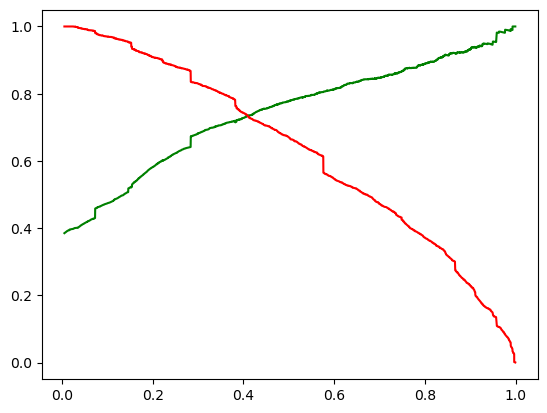

In [176]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [177]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [178]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Showing interest,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Others
3271,0,-0.601776,0,0,0,1,0,0,0,0,0,0
1490,0,1.899087,1,0,0,1,0,0,0,1,0,0
7936,0,-0.754853,0,0,0,1,0,0,0,0,0,0
4216,0,-0.891330,0,0,1,1,0,0,0,0,1,0
3830,0,-0.588866,1,0,0,1,0,0,0,0,0,0


In [179]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

,0
3271,0.193890
1490,0.965466
7936,0.170969
4216,0.748603
3830,0.141577


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.193890
1,1,1490,0.965466
2,0,7936,0.170969
3,1,4216,0.748603
4,0,3830,0.141577


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [189]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,3271,0.193890
1,1,1490,0.965466
2,0,7936,0.170969
3,1,4216,0.748603
4,0,3830,0.141577


In [190]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [191]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,3271,0.193890,0
1,1,1490,0.965466,1
2,0,7936,0.170969,0
3,1,4216,0.748603,1
4,0,3830,0.141577,0


In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.792508262945281

In [193]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1393,  341],
       [ 224,  765]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7735085945399394

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.8033448673587081

In [197]:
# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.6916817359855335
0.8614718614718615


In [198]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6916817359855335

In [199]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7735085945399394

- Lead Score Assigning

In [200]:
y_pred_final['Lead Score']=y_pred_final['Converted_Prob'].apply(lambda x:round(x*100))

y_pred_final.head(25)

,Converted,Lead Number,Converted_Prob,final_predicted,Lead Score
0,0,3271,0.193890,0,19
1,1,1490,0.965466,1,97
2,0,7936,0.170969,0,17
3,1,4216,0.748603,1,75
4,0,3830,0.141577,0,14
5,1,1800,0.742194,1,74
6,0,6507,0.439351,1,44
7,0,4821,0.301091,0,30
8,1,4223,0.956930,1,96
9,0,4714,0.384427,1,38


In [201]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6916817359855335

In [202]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7735085945399394


We can see that the equation of our best fitted line is:

$ cnt = (-1.55634  \times  Do Not Email) + (1.0050  \times  Total Time Spent on Website) - (0.3903 \times A free copy of Mastering The Interview) + (0.7888 \times Lead Source_Olark Chat) + (3.5838\times Lead Source_Reference) + (0.8404 \times Last Activity_Email Opened) + (0.6151 \times Last Activity_Page Visited on Website) + (2.0734 \times Last Activity_SMS Sent) + (1.1094 \times Last Activity_Showing interest) + (2.632 \times What is your current occupation_Working Professional ) - (0.7767 \times What Last Notable Activity_Modified ) + (1.8021 \times What Last Notable Activity_Others ) $